In [ ]:
# Content and Collaborative and Hybrid filtering for Movie Recommendation System



## memory base approach

In [1]:
#importing Libraeies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [2]:
path = 'C:/study data/internship/Collaborative Recommender System/collab/'
movies = pd.read_csv(path + 'movie.csv')
keywords = pd.read_csv(path + 'keywords.csv')
ratings = pd.read_csv(path + 'rating.csv')


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,11:53:47 PM
1,1,29,3.5,11:31:16 PM
2,1,32,3.5,11:33:39 PM
3,1,47,3.5,11:32:07 PM
4,1,50,3.5,11:29:40 PM


In [6]:
movies['genres'] = movies['genres'].str.replace('|',' ')

In [7]:
len(movies.movieId.unique())

27278

In [8]:
len(ratings.movieId.unique())

14026

In [9]:
ratings_f =ratings.groupby('userId').filter(lambda x: len(x) >= 55)

movie_list_rating = ratings_f.movieId.unique().tolist()

In [10]:
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100

51.055795879463304

In [11]:
movies = movies[movies.movieId.isin(movie_list_rating)]

In [12]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance


In [13]:
keywords.head()

,userId,movieId,keywords,timestamp
0,18,4141,Mark Waters,06:19:40 PM
1,65,208,dark hero,01:41:18 AM
2,65,353,dark hero,01:41:19 AM
3,65,521,noir thriller,01:39:43 AM
4,65,592,dark hero,01:41:18 AM


In [14]:
mapping_file =dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [15]:
keywords.drop(['timestamp'],1, inplace=True)
ratings_f.drop(['timestamp'],1, inplace=True)

C:\Users\goura\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
#Mearging metadata sets

In [16]:
mixed = pd.merge(movies, keywords, on='movieId', how='left')
mixed.head(3)

,movieId,title,genres,userId,keywords
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature


In [17]:
mixed.fillna(" ", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['keywords'].apply( lambda x: "%s" % ' '. join(x)))

Final = pd.merge(movies, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['keywords','genres']].apply( lambda x: ' '.join(x), axis = 1)

Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story (1995),Watched computer animation Disney animated fea...
1,2,Jumanji (1995),time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),old people that is actually funny sequel fever...


In [18]:
Final.shape

(13927, 5)

In [18]:
#Final.loc[1. "metadata"]

tf-idf vectors and  truncated svd

In [19]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
print(tfidf_df.shape)


(13927, 21416)


In [20]:
 tfidf_df.shape

(13927, 21416)

In [21]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21406,21407,21408,21409,21410,21411,21412,21413,21414,21415
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Thr first 200 components explain over 50% of the veriance

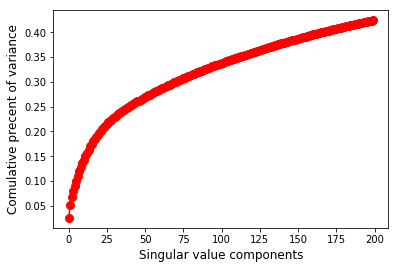

In [22]:
# compress with svd
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)

# plot
explained =svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms =16, color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Comulative precent of variance', fontsize=12)
plt.show()

In [23]:
n= 200
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=Final.title.tolist())


In [24]:
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.046683,0.054535,0.024221,0.003132,0.051355,0.078276,0.007776,0.139152,-0.001869,-0.059522,...,0.008459,-0.072844,0.002874,0.021773,-0.039820,-0.011062,0.013848,0.106656,-0.033894,-0.040641
Jumanji (1995),0.023023,0.011900,0.041791,0.010582,0.024288,0.064585,0.017493,0.095066,-0.007275,-0.030334,...,0.002312,0.002077,-0.023906,-0.031985,0.022854,0.027606,0.001733,-0.009786,-0.018584,0.018543
Grumpier Old Men (1995),0.059364,0.066519,-0.001940,0.011918,0.003267,0.018108,0.027874,-0.006021,-0.000948,-0.001075,...,0.015112,0.002428,-0.002137,-0.018998,0.009070,0.015089,0.008146,-0.028468,-0.004259,-0.006400
Waiting to Exhale (1995),0.167244,0.046961,-0.025285,0.039760,-0.012778,0.052346,0.096410,-0.038001,-0.010552,-0.007004,...,-0.029581,-0.000449,-0.100588,-0.079016,-0.049325,0.009821,0.112412,-0.053212,0.058969,-0.039598
Father of the Bride Part II (1995),0.068023,0.082976,0.007729,0.002642,0.013572,0.012850,-0.010717,0.028037,0.002894,-0.005771,...,-0.006480,0.009534,-0.060654,-0.014342,-0.031980,0.019938,0.013385,0.004803,0.008355,-0.005038
Heat (1995),0.030834,-0.004156,0.058053,0.012069,0.091480,0.012959,0.003079,0.022370,-0.001018,-0.005246,...,0.048916,0.025648,-0.031700,-0.014582,0.010343,0.002405,0.009808,0.006804,-0.007486,-0.008500
Sabrina (1995),0.071767,0.024558,0.005669,0.062984,-0.002823,0.081624,0.116571,-0.027457,-0.001762,-0.008655,...,-0.045297,0.055746,-0.038594,-0.074046,-0.064768,0.009613,0.042846,-0.029739,-0.015170,0.031658
Tom and Huck (1995),0.027043,0.008662,0.032754,0.032356,0.044071,0.069007,0.013774,0.101967,0.012427,-0.015111,...,0.002485,-0.037104,-0.040424,0.089680,0.031484,0.089770,0.043624,0.002412,-0.050043,0.044324
Sudden Death (1995),0.017627,-0.000107,0.031018,0.005979,0.059549,0.015942,0.007557,0.037768,-0.017141,0.010619,...,-0.045671,-0.003706,-0.022678,0.005245,-0.028810,-0.007459,0.001914,0.001310,0.019073,-0.003766
GoldenEye (1995),0.015806,0.002050,0.032843,0.007340,0.044553,0.020564,0.005377,0.032132,-0.005739,0.008212,...,-0.065456,0.001409,-0.030841,-0.011231,0.027511,0.015664,-0.003379,-0.052284,0.010126,0.051327


In [25]:
latent_matrix.shape

(13927, 200)

In [26]:
latent_matrix[0]

array([ 4.66833435e-02,  5.45353392e-02,  2.42206840e-02,  3.13193741e-03,
        5.13551921e-02,  7.82757651e-02,  7.77633998e-03,  1.39151542e-01,
       -1.86948502e-03, -5.95223700e-02, -1.84491511e-01,  1.01517835e-01,
        1.85935627e-01, -1.37927955e-01, -3.08992500e-02,  1.19076358e-01,
       -2.96646640e-02,  3.63892231e-02, -6.75774526e-02, -3.21494793e-02,
        2.19618655e-01, -2.73468463e-01,  1.56274447e-01, -1.76760437e-02,
        9.76782951e-03, -1.26615959e-02, -4.24907193e-02,  1.12541376e-01,
       -6.29511833e-02, -1.84950696e-01,  8.12065217e-03, -1.06509209e-02,
        1.86537070e-02,  3.95334763e-02,  4.26310909e-02,  4.37980232e-02,
       -4.58964889e-02,  2.19717512e-02, -1.36456263e-01,  1.28597997e-02,
        2.92893307e-03, -5.12731889e-02,  1.51390588e-02,  1.92202674e-02,
        5.49627248e-02,  6.83983995e-02, -2.54361505e-02,  4.42386352e-02,
       -2.47090612e-02,  3.12052322e-02,  1.04260591e-01,  1.04129703e-02,
        1.08434495e-02,  

# Creating a Collaborative latent matrix from user ratings:

In [30]:
ratings_f.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [31]:
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on="movieId", how="right")

  

In [32]:
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns ='userId', values='rating').fillna(0)

In [33]:
ratings_f2.head(3)

userId,1,2,3,5,7,8,11,13,14,16,...,7104,7105,7106,7107,7110,7111,7113,7115,7116,7117
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [34]:
ratings_f1.shape

(951478, 3)

In [35]:
ratings_f2.shape

(13927, 4171)

In [36]:
len(ratings_f.movieId.unique())

13927

In [37]:
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2,
                                 index=Final.title.tolist())


In [38]:
latent_matrix_2_df.shape


(13927, 200)

In [39]:
latent_matrix_2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),130.247344,-1.182495,33.084862,13.287131,10.655931,38.908597,0.538650,10.039593,16.230121,-0.498173,...,-1.344616,-3.070077,-2.415947,-0.974265,6.239208,1.225914,-2.521598,-4.899811,0.534841,-4.811625
Jumanji (1995),59.866292,-0.471595,35.778119,-10.739255,-9.458449,10.080358,-12.393712,10.916593,-2.299282,3.126287,...,-2.646825,-5.753965,-0.485850,0.338490,-3.350961,4.814048,0.503584,1.958600,-0.674410,2.356472
Grumpier Old Men (1995),25.570032,-11.094101,18.004580,-8.866821,-10.690738,1.029514,-2.485544,-0.472503,2.396000,5.291906,...,-1.724310,3.653713,2.288719,-0.436343,-0.963081,3.513828,1.982896,-1.793061,-1.738054,1.221228
Waiting to Exhale (1995),6.456417,-6.838861,5.687934,-1.385781,-5.557861,-0.929589,0.828626,1.214889,2.009962,-1.857195,...,1.240905,0.087914,-2.229779,0.410027,-0.329102,-0.175362,0.136285,0.752959,0.699661,-0.848702
Father of the Bride Part II (1995),22.382683,-9.015757,21.202095,-10.513624,-13.814335,2.920780,-1.153893,0.829484,1.904894,1.108849,...,-1.299889,0.857911,0.111297,-0.090556,-1.184977,0.214845,-0.139046,0.685999,1.082738,1.799505


In [40]:
latent_matrix_1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.046683,0.054535,0.024221,0.003132,0.051355,0.078276,0.007776,0.139152,-0.001869,-0.059522,...,0.008459,-0.072844,0.002874,0.021773,-0.039820,-0.011062,0.013848,0.106656,-0.033894,-0.040641
Jumanji (1995),0.023023,0.011900,0.041791,0.010582,0.024288,0.064585,0.017493,0.095066,-0.007275,-0.030334,...,0.002312,0.002077,-0.023906,-0.031985,0.022854,0.027606,0.001733,-0.009786,-0.018584,0.018543
Grumpier Old Men (1995),0.059364,0.066519,-0.001940,0.011918,0.003267,0.018108,0.027874,-0.006021,-0.000948,-0.001075,...,0.015112,0.002428,-0.002137,-0.018998,0.009070,0.015089,0.008146,-0.028468,-0.004259,-0.006400
Waiting to Exhale (1995),0.167244,0.046961,-0.025285,0.039760,-0.012778,0.052346,0.096410,-0.038001,-0.010552,-0.007004,...,-0.029581,-0.000449,-0.100588,-0.079016,-0.049325,0.009821,0.112412,-0.053212,0.058969,-0.039598
Father of the Bride Part II (1995),0.068023,0.082976,0.007729,0.002642,0.013572,0.012850,-0.010717,0.028037,0.002894,-0.005771,...,-0.006480,0.009534,-0.060654,-0.014342,-0.031980,0.019938,0.013385,0.004803,0.008355,-0.005038


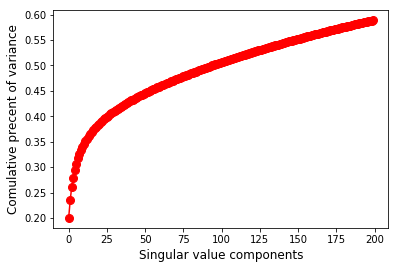

In [41]:
#plot 
explained =svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms =16, color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Comulative precent of variance', fontsize=12)
plt.show()

# Running a content  / Collaborative and hybrid consine Similarity :

In [42]:
#take the latent vactors for a selected movies from both content
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1, -1)

#calculate the similartity of this movie with the others in the list 
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

#an average measure of both content and collaborative
hybrid = ((score_1 +score_2)/2.0)

#form a data frame of similar movies
dictDf = {'content' : score_1, 'collaborative': score_2, "hybrid" : hybrid}
similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index )

#sort it on thn basis of either: content, collaborative or hybrid

# here : content filtering

similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)


,content,collaborative,hybrid
Toy Story 2 (1999),0.965637,0.750749,0.858193
"Bug's Life, A (1998)",0.909898,0.646814,0.778356
"Monsters, Inc. (2001)",0.892062,0.625464,0.758763
Finding Nemo (2003),0.880333,0.608556,0.744445
"Incredibles, The (2004)",0.795642,0.566187,0.680915
Ice Age (2002),0.879699,0.464668,0.672183
Ratatouille (2007),0.898313,0.397933,0.648123
Antz (1998),0.749790,0.533679,0.641735
Toy Story 3 (2010),0.856844,0.390936,0.623890
Shrek (2001),0.582396,0.633873,0.608135


In [43]:
#content filtering
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)


,content,collaborative,hybrid
Toy Story 2 (1999),0.965637,0.750749,0.858193
"Bug's Life, A (1998)",0.909898,0.646814,0.778356
Ratatouille (2007),0.898313,0.397933,0.648123
"Monsters, Inc. (2001)",0.892062,0.625464,0.758763
Finding Nemo (2003),0.880333,0.608556,0.744445
Ice Age (2002),0.879699,0.464668,0.672183
Toy Story 3 (2010),0.856844,0.390936,0.623890
Monsters University (2013),0.816643,0.177774,0.497209
"Incredibles, The (2004)",0.795642,0.566187,0.680915
Tin Toy (1988),0.790081,0.049479,0.419780


In [44]:
# Hybrid filtering

similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)


,content,collaborative,hybrid
Toy Story 2 (1999),0.965637,0.750749,0.858193
"Bug's Life, A (1998)",0.909898,0.646814,0.778356
"Monsters, Inc. (2001)",0.892062,0.625464,0.758763
Finding Nemo (2003),0.880333,0.608556,0.744445
"Incredibles, The (2004)",0.795642,0.566187,0.680915
Ice Age (2002),0.879699,0.464668,0.672183
Ratatouille (2007),0.898313,0.397933,0.648123
Antz (1998),0.749790,0.533679,0.641735
Toy Story 3 (2010),0.856844,0.390936,0.623890
Shrek (2001),0.582396,0.633873,0.608135
